In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Este es un conjunto de datos transnacional que contiene todas las transacciones ocurridas entre el 01/12/2010 y el 09/12/2011 para una empresa minorista en línea sin tienda física registrada y con sede en el Reino Unido. La empresa vende principalmente regalos únicos para cualquier ocasión. Muchos clientes de la empresa son mayoristas

https://www.kaggle.com/datasets/carrie1/ecommerce-data/data

Inspiración
Los análisis de este conjunto de datos podrían incluir series temporales, agrupamiento, clasificación y más

In [2]:
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Explorar datos

In [4]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Columnas

### Analizando la columna InvoiceNo

In [5]:
data['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
581483        1
581566        1
C581499       1
C536383       1
C536379       1
Name: count, Length: 25900, dtype: int64

### Analizando la columna StockCode

In [6]:
data['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
85179a       1
23617        1
90214U       1
47591b       1
72802c       1
Name: count, Length: 4070, dtype: int64

### Analizando la columna descripción

In [7]:
data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
ANT SILVER TURQUOISE BOUDICCA RING       1
Damages                                  1
Found by jackie                          1
water damaged                            1
lost in space                            1
Name: count, Length: 4223, dtype: int64

In [8]:
from Levenshtein import distance
from itertools import combinations

words = data['Description'].dropna().unique()

similar = [
    (a, b) for a, b in combinations(words, 2)
    if distance(a, b) < 3
]


In [9]:
similar[0:10]

[('HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD'),
 (' SET 2 TEA TOWELS I LOVE LONDON ', 'SET 2 TEA TOWELS I LOVE LONDON '),
 ('FAIRY TALE COTTAGE NIGHTLIGHT', 'FAIRY TALE COTTAGE NIGHT LIGHT'),
 ('RED RETROSPOT MUG', 'RED RETROSPOT CUP'),
 ('STRAWBERRY CERAMIC TRINKET BOX', 'STRAWBERRY CERAMIC TRINKET POT'),
 ('BATHROOM METAL SIGN', 'WASHROOM METAL SIGN'),
 ('BATHROOM METAL SIGN', 'BATHROOM METAL SIGN '),
 ('BREAD BIN DINER STYLE PINK', 'BREAD BIN DINER STYLE MINT'),
 ('LUNCH BAG SUKI  DESIGN ', 'LUNCH BAG SUKI DESIGN '),
 ('PACK 3 BOXES BIRD PANNETONE ', 'PACK 3 BOXES BIRD PANETTONE ')]

Como se puede observar existen datos mal escritos como es el caso de ' SET 2 TEA TOWELS I LOVE LONDON ' y'SET 2 TEA TOWELS I LOVE LONDON ', en particular aquí hay un espacio demás. Diferentes maneras de escribir como 'sold as set on dotcom' y'sold as set by dotcom'.

¿Requiere alguna limpieza de dato?

No, para lo que quiero hacer aquí de hecho está columna es irrelevante además de que tenemos una columna que identifica el producto el cual es StockCode.

In [10]:
data[data['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


### Analizando la columna Quantity

In [11]:
data['Quantity'].value_counts()

Quantity
 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
-355          1
-155          1
 1404         1
 388          1
 490          1
Name: count, Length: 722, dtype: int64

In [12]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
data[data['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [14]:
data.iloc[[*((data[data['Quantity'] < 0].index - 1).to_list()), *data[data['Quantity'] < 0].index.to_list()] ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
140,536381,21523,DOORMAT FANCY FONT HOME SWEET HOME,10,12/1/2010 9:41,6.75,15311.0,United Kingdom
153,536382,22783,SET 3 WICKER OVAL BASKETS W LIDS,4,12/1/2010 9:45,16.95,16098.0,United Kingdom
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,12/1/2010 10:19,1.65,17511.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


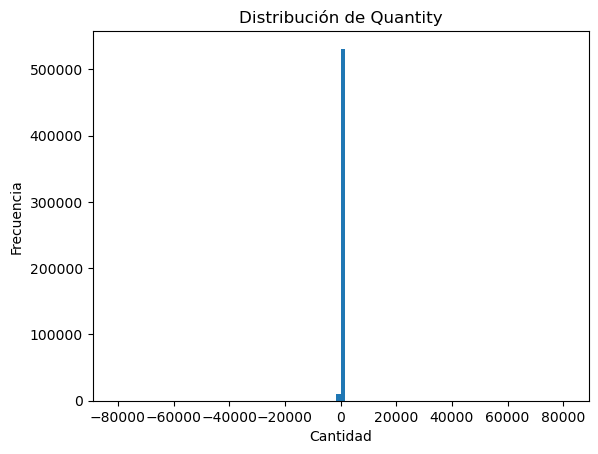

In [15]:
plt.hist(data['Quantity'], bins=100)
plt.title("Distribución de Quantity")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()

### Analizando la columna InvoiceDate

In [16]:
data['InvoiceDate'].value_counts()

InvoiceDate
10/31/2011 14:41    1114
12/8/2011 9:28       749
12/9/2011 10:03      731
12/5/2011 17:24      721
6/29/2011 15:58      705
                    ... 
10/27/2011 10:58       1
10/27/2011 12:57       1
10/27/2011 12:13       1
12/9/2011 11:57        1
12/9/2011 11:50        1
Name: count, Length: 23260, dtype: int64

### Analizando la columna UnitPrice

In [17]:
data['UnitPrice'].value_counts()

UnitPrice
1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
185.28        1
187.21        1
252.57        1
183.20        1
110.92        1
Name: count, Length: 1630, dtype: int64

In [18]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [19]:
data[data['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom


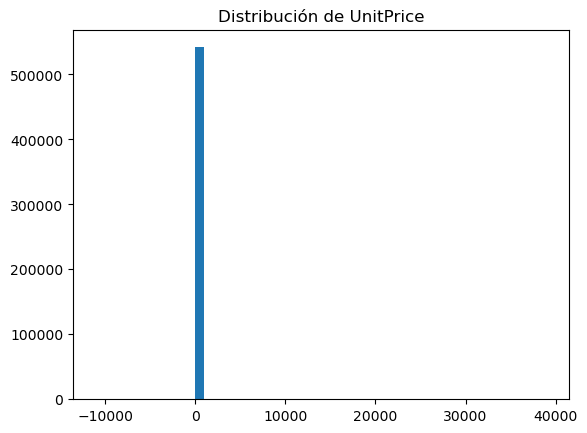

In [20]:
plt.hist(data['UnitPrice'], bins=50)
plt.title("Distribución de UnitPrice")
plt.show()

### Analizando columna CustomerID

In [21]:
data['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
17986.0       1
13256.0       1
18184.0       1
13747.0       1
15195.0       1
Name: count, Length: 4372, dtype: int64

In [22]:
data[data['CustomerID'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
data[data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


### Analizando la columna Country

In [24]:
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


# Limpieza de datos

In [25]:
data['Description'] = data['Description'].fillna('Desconocido')
print(f"Número de valores nulos en Description: {data['Description'].isnull().sum()}")


Número de valores nulos en Description: 0


In [26]:
duplicates = data[data.duplicated(subset=["InvoiceNo", "StockCode", "Quantity"], keep=False)]
print(f"Número total de valores duplicados: {len(duplicates)}")

print(f"Porcentaje total de valores duplicados = {(len(duplicates)/len(data))*100:.2f}%")


Número total de valores duplicados: 10426
Porcentaje total de valores duplicados = 1.92%


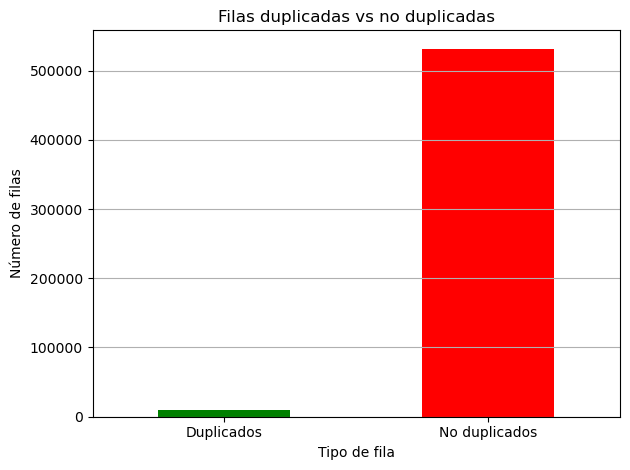

In [27]:
dup_counts = pd.Series({
    'Duplicados': len(duplicates),
    'No duplicados': len(data) - len(duplicates)
})
dup_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Filas duplicadas vs no duplicadas')
plt.ylabel('Número de filas')
plt.xlabel('Tipo de fila')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [28]:
print(f"Datos antes de eliminar duplicados: {len(data)}")
data = data.drop_duplicates(subset=["InvoiceNo", "StockCode", "Quantity"], keep="first")
print(f"Datos después de eliminar duplicados: {len(data)}")


Datos antes de eliminar duplicados: 541909
Datos después de eliminar duplicados: 536478


Número total de pedidos cancelados: 9177


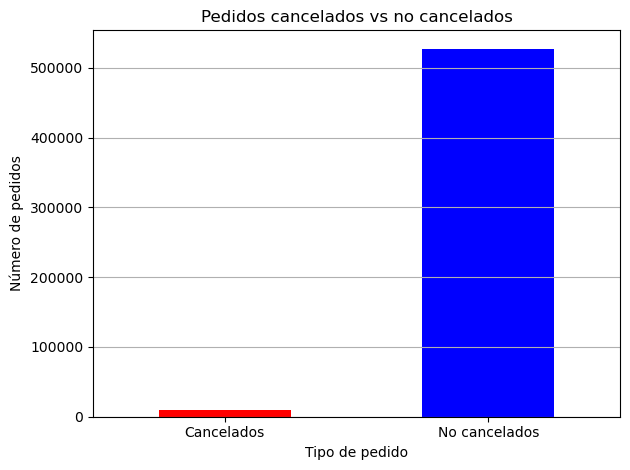

In [29]:
cancel = data['InvoiceNo'].str.startswith('C')
print(f"Número total de pedidos cancelados: {cancel.sum()}")

cancel_order = pd.Series({
    'Cancelados': cancel.sum(),
    'No cancelados': len(data) - cancel.sum()
})
cancel_order.plot(kind='bar', color=['red', 'blue'])
plt.title("Pedidos cancelados vs no cancelados")
plt.xlabel("Tipo de pedido")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [30]:
data['Total_Price'] = data['Quantity'] * data['UnitPrice']

In [31]:
from datetime import datetime
data_month = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')
data['Month'] = data_month.dt.month
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30,12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50,12
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10,12
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08,12


In [32]:
data['Description'] = data['Description'].str.strip().str.capitalize()
data['Description'].head(10)

0     White hanging heart t-light holder
1                    White metal lantern
2         Cream cupid hearts coat hanger
3    Knitted union flag hot water bottle
4         Red woolly hottie white heart.
5           Set 7 babushka nesting boxes
6      Glass star frosted t-light holder
7                 Hand warmer union jack
8              Hand warmer red polka dot
9          Assorted colour bird ornament
Name: Description, dtype: object

N.º de datos bajos (≤ 50): 505427
N.º de datos medios (> 50 y ≤ 200): 26179
N.º de datos altos (> 200): 4872


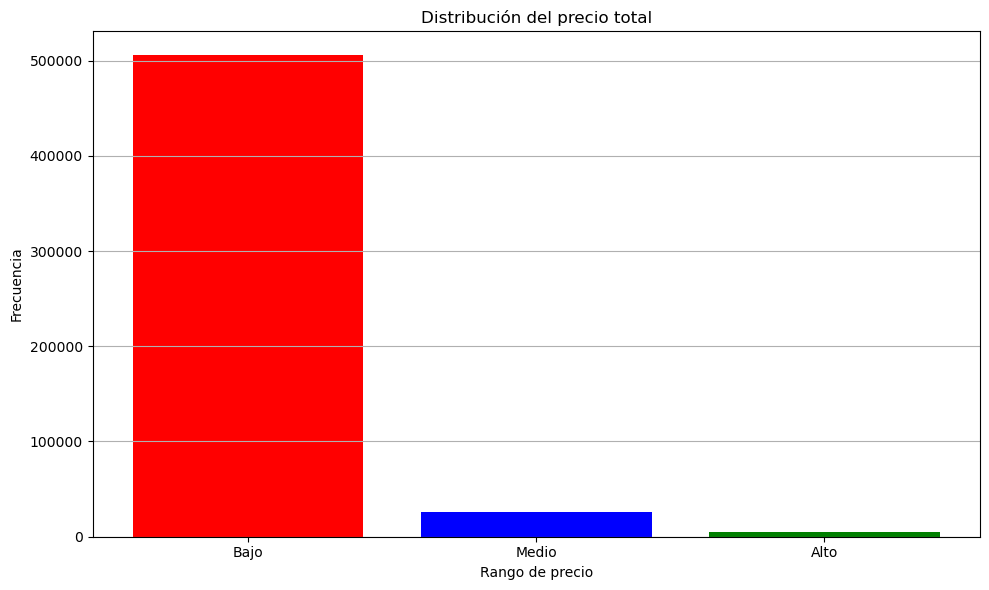

In [33]:
low_data = data[data['Total_Price'] <= 50]
print(f"N.º de datos bajos (≤ 50): {len(low_data)}")

medium_data = data[(data['Total_Price'] > 50) & (data['Total_Price'] <= 200)]
print(f"N.º de datos medios (> 50 y ≤ 200): {len(medium_data)}")

high_data = data[data['Total_Price'] > 200]
print(f"N.º de datos altos (> 200): {len(high_data)}")

plt.figure(figsize=(10, 6))
plt.bar(['Bajo', 'Medio', 'Alto'],
        [len(low_data), len(medium_data), len(high_data)],
        color=['red', 'blue', 'green'])
plt.title("Distribución del precio total")
plt.xlabel("Rango de precio")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [34]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]


# Transformaciones

In [35]:
# Transformaciones a fecha
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Borramos customerID vacíos
data.dropna(subset=['CustomerID'], inplace=True)
data['CustomerID'] = data['CustomerID'].astype(int)

#  Variable derivada
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Analisis de datos

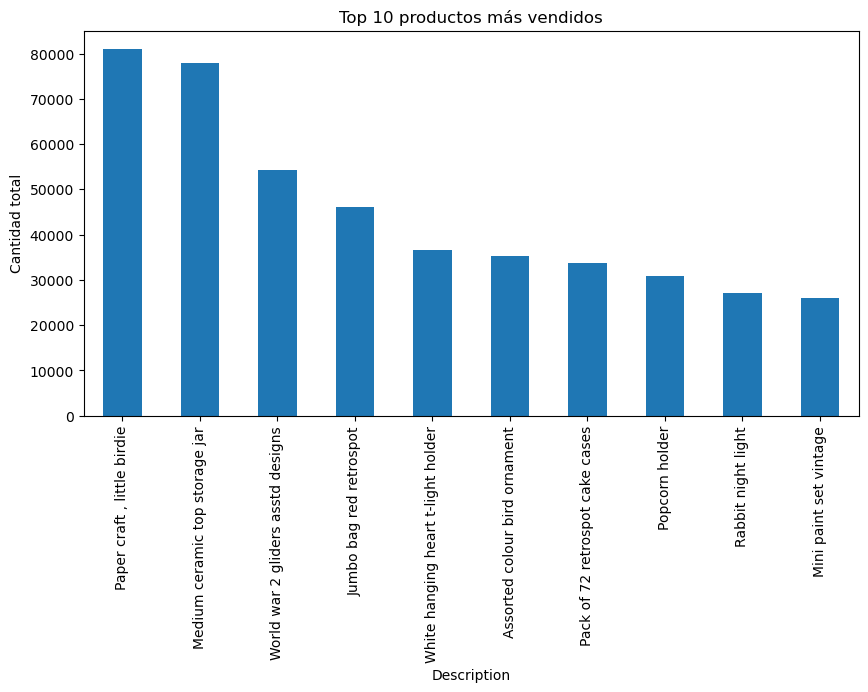

In [36]:
mas_vendidos = (
    data.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

mas_vendidos.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 productos más vendidos')
plt.ylabel('Cantidad total')
plt.show()


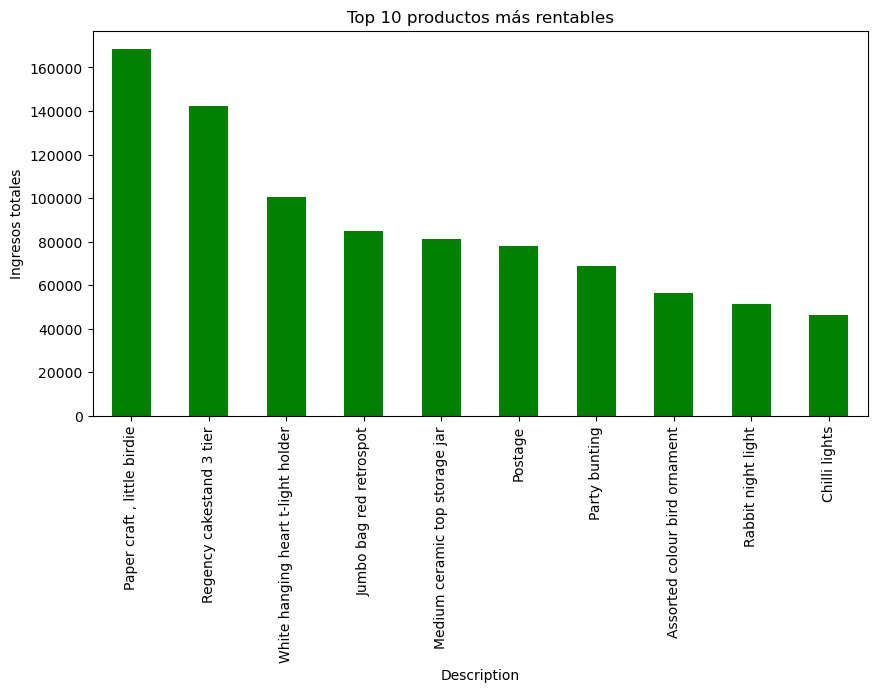

In [37]:
mas_rentables = (
    data.groupby('Description')['Total_Price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

mas_rentables.plot(kind='bar', figsize=(10,5), color='green')
plt.title('Top 10 productos más rentables')
plt.ylabel('Ingresos totales')
plt.show()


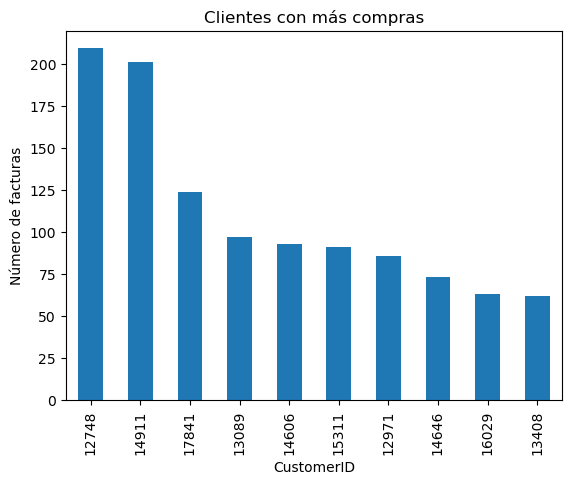

In [38]:
clientes = (
    data.groupby('CustomerID')['InvoiceNo']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

clientes.plot(kind='bar')
plt.title('Clientes con más compras')
plt.ylabel('Número de facturas')
plt.show()


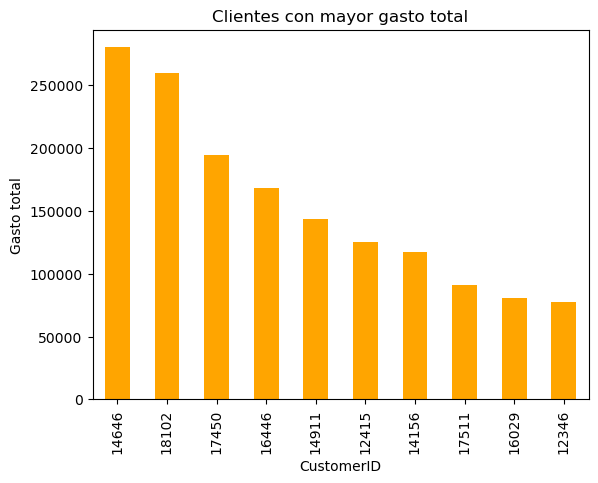

In [39]:
clientes_gasto = (
    data.groupby('CustomerID')['Total_Price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

clientes_gasto.plot(kind='bar', color='orange')
plt.title('Clientes con mayor gasto total')
plt.ylabel('Gasto total')
plt.show()


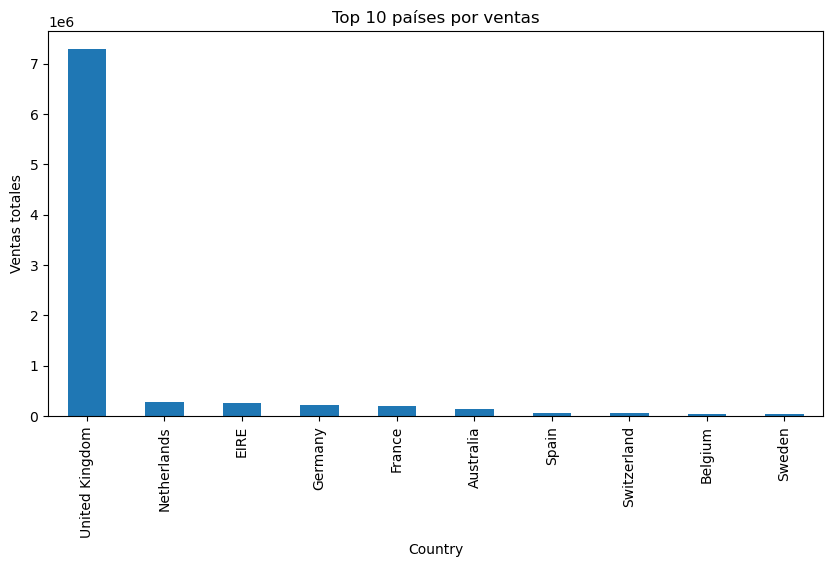

In [40]:
ventas_pais = (
    data.groupby('Country')['Total_Price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

ventas_pais.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 países por ventas')
plt.ylabel('Ventas totales')
plt.show()


In [41]:
customer_summary = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'Total_Price': 'sum'
}).rename(columns={
    'InvoiceNo': 'Num_Facturas',
    'Quantity': 'Total_Cantidad',
    'Total_Price': 'Gasto_Total'
})

customer_summary.head()


,Num_Facturas,Total_Cantidad,Gasto_Total
CustomerID,,,
12346,1,74215,77183.60
12347,7,2458,4310.00
12348,4,2341,1797.24
12349,1,631,1757.55
12350,1,197,334.40


In [42]:
product_summary = data.groupby('Description').agg({
    'Quantity': 'sum',
    'Total_Price': 'sum'
}).rename(columns={
    'Quantity': 'Cantidad_Vendida',
    'Total_Price': 'Ingresos_Totales'
})

product_summary.head()


,Cantidad_Vendida,Ingresos_Totales
Description,,
10 colour spaceboy pen,6267,5209.17
12 coloured party balloons,2089,1359.65
12 daisy pegs in wood box,322,531.30
12 egg house painted wood,111,1425.27
12 hanging eggs hand painted,40,83.20


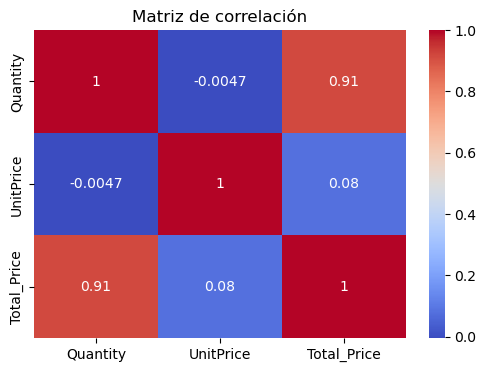

In [43]:
datos = data[['Quantity', 'UnitPrice', 'Total_Price']]

plt.figure(figsize=(6,4))
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


### PCA

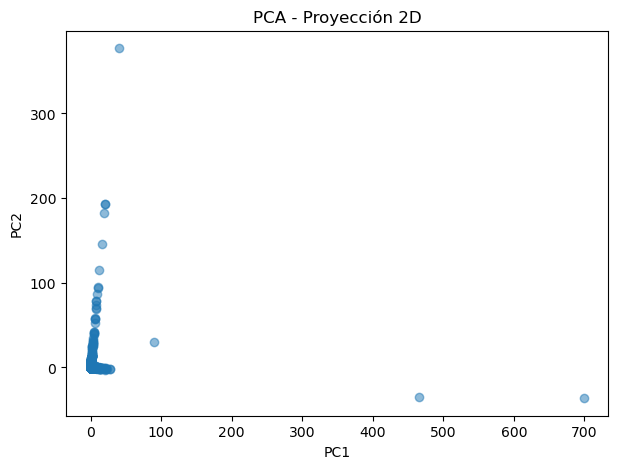

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features = data[['Quantity', 'UnitPrice', 'Total_Price']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Proyección 2D')
plt.show()


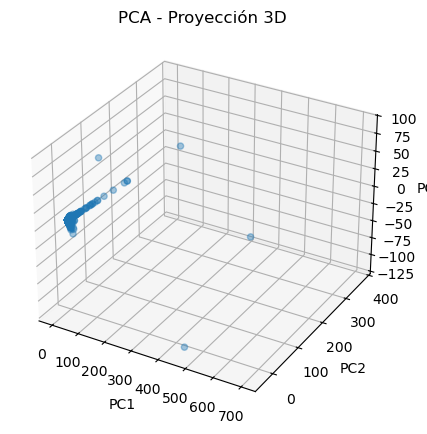

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], alpha=0.4)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - Proyección 3D')
plt.show()


### Análisis Espectral y Componentes Periódicos

In [46]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Month,TotalAmount
0,536365,85123A,White hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,15.30
1,536365,71053,White metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,20.34
2,536365,84406B,Cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,22.00
3,536365,84029G,Knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,20.34
4,536365,84029E,Red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,Pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,10.20
541905,581587,22899,Children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,12.60
541906,581587,23254,Childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,16.60
541907,581587,23255,Childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,16.60


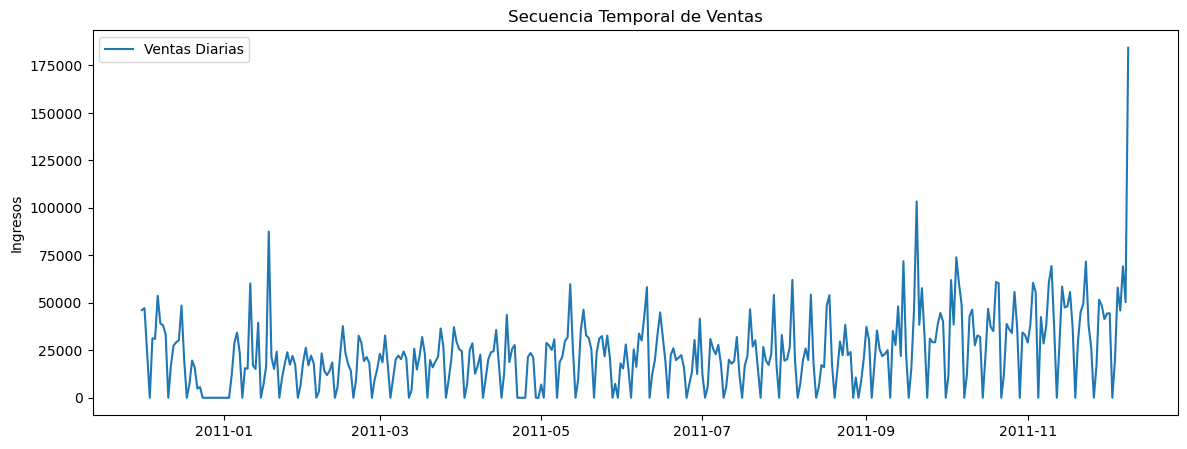

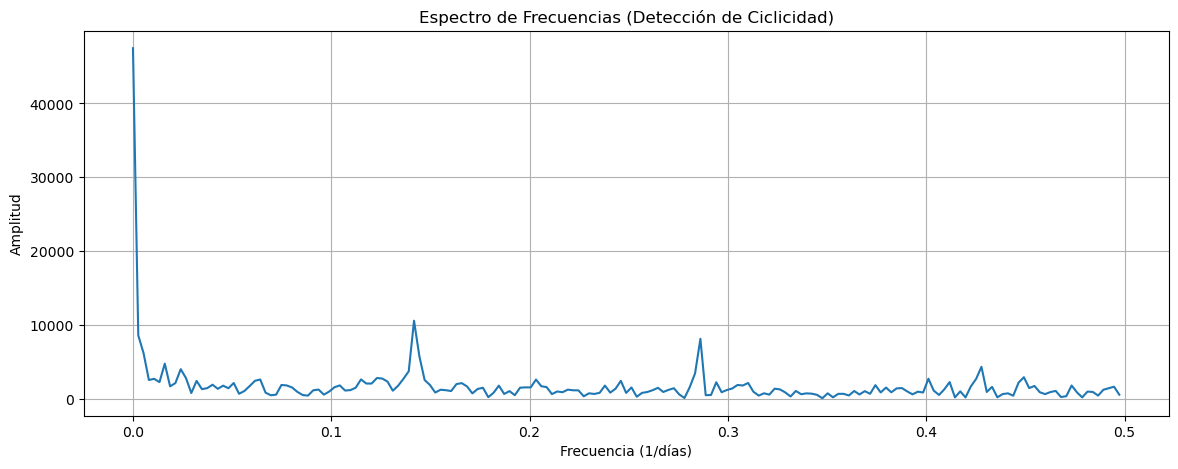

In [47]:
ts_data = data.groupby(data['InvoiceDate'].dt.date)['TotalAmount'].sum()
ts_data.index = pd.to_datetime(ts_data.index)
ts_data = ts_data.asfreq('D').fillna(0)

plt.figure(figsize=(14, 5))
plt.plot(ts_data, label='Ventas Diarias')
plt.title('Secuencia Temporal de Ventas')
plt.ylabel('Ingresos')
plt.legend()
plt.show()

n = len(ts_data)
yf = fft(ts_data.values)
xf = fftfreq(n, 1) # Muestreo diario (T=1)

plt.figure(figsize=(14, 5))
plt.plot(xf[:n//2], 2.0/n * np.abs(yf[0:n//2]))
plt.title('Espectro de Frecuencias (Detección de Ciclicidad)')
plt.xlabel('Frecuencia (1/días)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

# Segmentación de Clientes con Modelo RFM y K-Means

Implementamos una segmentación no supervisada basada en el comportamiento del cliente:
* **Recency (R):** Días desde la última compra.
* **Frequency (F):** Número de compras totales.
* **Monetary (M):** Dinero total gastado.

**Metodología:**
1.  Calculamos las métricas RFM por cliente.
2.  Aplicamos transformación logarítmica para manejar la asimetría de los datos (skewness).
3.  Estandarizamos las variables para que tengan media 0 y desviación estándar 1.
4.  Utilizamos el **Método del Codo** para decidir el número óptimo de clusters.
5.  Aplicamos **K-Means** para asignar grupos.

In [48]:
# 1. Construcción de matriz RFM
fecha_ref = data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (fecha_ref - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'})

# 2. Preprocesamiento (Log + Scaling)
rfm_log = np.log1p(rfm)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)



In [49]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40
...,...,...,...
18280,278,1,180.60
18281,181,1,80.82
18282,8,2,178.05


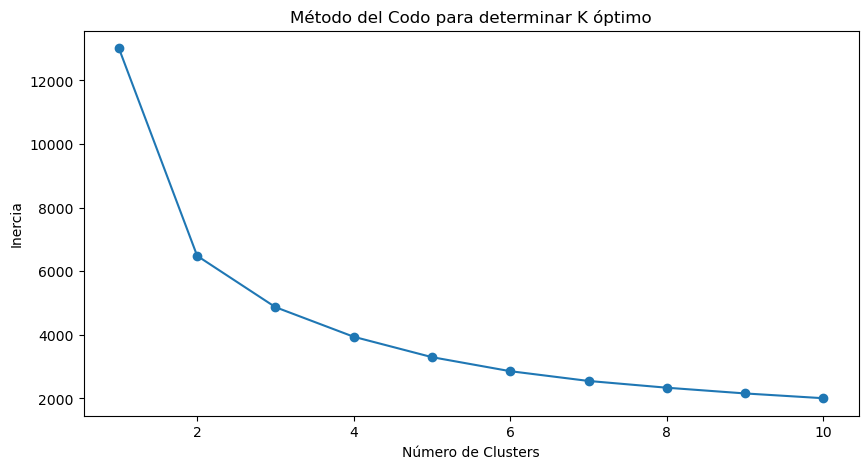

In [50]:
# 3. Método del Codo
inercia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inercia, marker='o')
plt.title('Método del Codo para determinar K óptimo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# 4. Aplicar K-Means (Ajustar n_clusters según el gráfico anterior, usaremos 3 por defecto)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [53]:
kmeans = KMeans(n_clusters=3, random_state=35, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [54]:
rfm

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,326,1,77183.60,2
12347,2,7,4310.00,1
12348,75,4,1797.24,2
12349,19,1,1757.55,2
12350,310,1,334.40,0
...,...,...,...,...
18280,278,1,180.60,0
18281,181,1,80.82,0
18282,8,2,178.05,2


## Visualización de clusteres con PCA

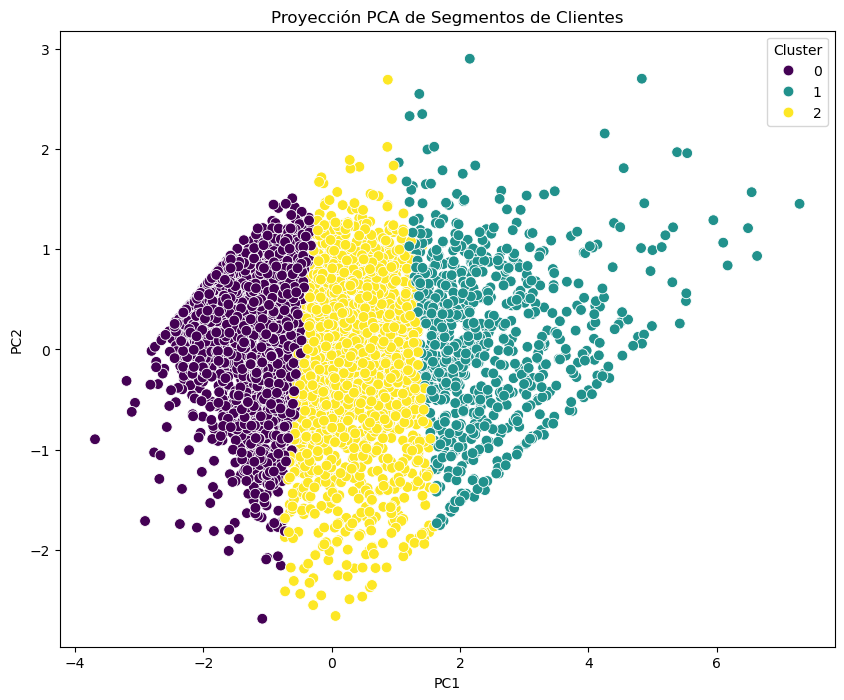

Varianza explicada por PC1 y PC2: [0.75083908 0.18782725]


In [56]:
from sklearn.decomposition import PCA
import seaborn as sns

# 1. Aplicar PCA
pca = PCA(n_components=2)
components = pca.fit_transform(rfm_scaled)

# Crear DataFrame para graficar
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = rfm['Cluster'].values

# 2. Visualización 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=60)
plt.title('Proyección PCA de Segmentos de Clientes')
plt.show()

# 3. Varianza explicada
print(f"Varianza explicada por PC1 y PC2: {pca.explained_variance_ratio_}")

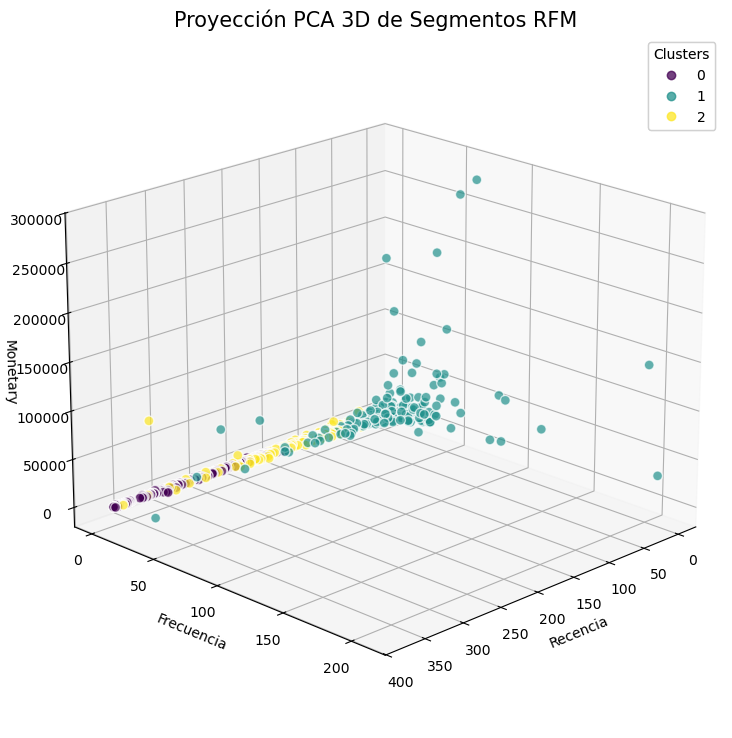

In [63]:
# 2. Visualización 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'], 
    rfm['Frequency'], 
    rfm['Monetary'], 
    c=rfm['Cluster'], 
    cmap='viridis', 
    s=50, 
    alpha=0.7,
    edgecolors='w'
)

# Configuración de etiquetas y título
ax.set_title('Proyección PCA 3D de Segmentos RFM', fontsize=15)
ax.set_xlabel('Recencia')
ax.set_ylabel('Frecuencia')
ax.set_zlabel('Monetary')

ax.view_init(elev=20, azim=45)

# Añadir una leyenda para los clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
ax.add_artist(legend)

plt.show()

In [65]:
rfm.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,167.494917,1.350990,360.407454
1,17.065977,13.302717,7862.353519
2,44.329599,3.374410,1254.329423
